In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time



## On regarde comment converge la finesse de l'aile

In [2]:
# On récupère la finesse sur chaque pas de temps
def get_infos_simu(file_name):
    # récupère les infos du fichier texte sur les finesses :
     with open(file_name, 'r') as f: 
            L_finesse = []
            f.readline()
            for ligne in f :
                a,b, cx, cy = ligne.split()
                cx, cy = -float(cx), -float(cy)
                L_finesse.append(cy/cx)
     return np.array(L_finesse)


In [60]:
# On récupère les résultats de la simu
def plot_result(file_name, numero):
    result_simus = get_infos_simu(file_name)[:1115]
    print(f"On a {result_simus.shape[0]} incréments")
    print(f"La moyenne de finesse est de {round(result_simus.mean(),3)}")
    plt.plot(result_simus, color='b')
    plt.grid()
    plt.xlabel('Itération')
    plt.ylabel('Cy/Cx')
    plt.title(f"Convergence de Cy/Cx simu{numero}")


# On récupère les résultats de la simu
def plot_result_filtre(file_name, numero, nombre_filtre):
    result_simus = get_infos_simu(file_name)
    result_mean = [np.mean(result_simus[i:i+nombre_filtre]) for i in range(0, len(result_simus)-nombre_filtre)]
    plt.plot(result_mean, color='b')
    plt.grid()
    plt.xlabel('Itération')
    plt.ylabel('Cy/Cx')
    plt.title(f"Convergence de Cy/Cx simu{numero} (moyenne glissante de {nombre_filtre} valeur)")


# On regarde quand les rapports des n derniers et n d'avant est inférieur à un certain pourcentage 
    
def percetage_trace2(file_name, nombre_filtre, percetage_end):
    result_simu = get_infos_simu(file_name)
    result_mean = [np.mean(result_simu[i:i+nombre_filtre]) for i in range(0, len(result_simu)-nombre_filtre)]
    for k in range( 2*nombre_filtre,len(result_mean)):
        if -percetage_end < result_mean[k]/result_mean[k-nombre_filtre] - 1 < percetage_end :
            return k
        
    return None

def percetage_trace(file_name, nombre_filtre, percetage_end):
    # donne avec l'écart à la moyenne
    result_simu = get_infos_simu(file_name)
    result_mean = [np.mean(result_simu[i:i+nombre_filtre]) for i in range(0, len(result_simu)-nombre_filtre)] # On lisse 
    for k in range(2* nombre_filtre,len(result_mean)):
        if np.std(result_mean[k-nombre_filtre:k]) < percetage_end :
            return k
        
    return None
       

def plot_percetage(file_name, nombre_filtre, percetage_end, color='red') :
    numero = percetage_trace(file_name, nombre_filtre, percetage_end)
    if numero is None :
        pass
    else :
        plt.axvline(x=numero,linestyle='--', label=f'itteration = {numero} : {100*percetage_end} % ', color=color)
        plt.legend()


### Simu 1 : on regarde Re=10^4 naca_24_0

On a 1115 incréments
La moyenne de finesse est de 1.838


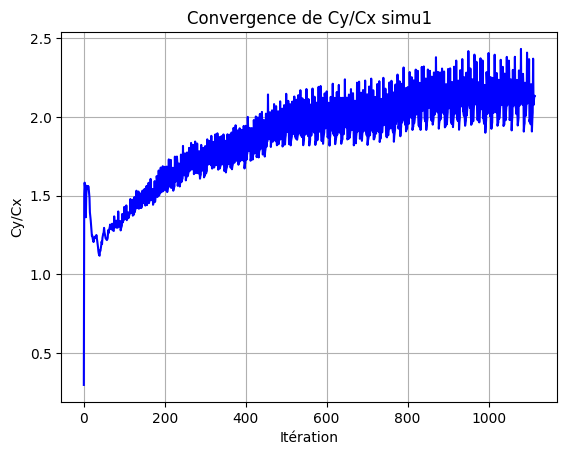

In [61]:
plot_result(file_name='result/simu1/Efforts.txt', numero=1)


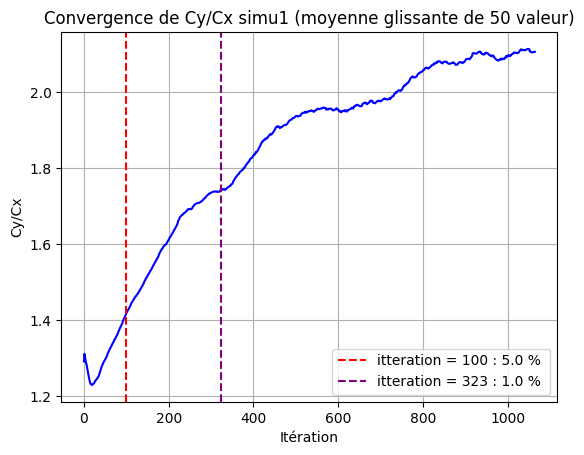

In [62]:
plot_result_filtre(file_name='result/simu1/Efforts.txt', numero=1, nombre_filtre=50)
plot_percetage(file_name='result/simu1/Efforts.txt', nombre_filtre=50, percetage_end=0.001, color= 'green')
plot_percetage(file_name='result/simu1/Efforts.txt', nombre_filtre=50, percetage_end=0.05)
plot_percetage(file_name='result/simu1/Efforts.txt', nombre_filtre=50, percetage_end=0.01, color='purple')

### On code un algo pour finir la simulation

In [63]:
# On fait un algo pour terminer ça 

def fin_algo(file_name, nombre_filtre, percetage_end):
    longueur = 0
    # On attend d'avoir assez d'ittération
    while longueur < 2*nombre_filtre:
        time.sleep(30)
        result_simu = get_infos_simu(file_name)
        longueur = len(result_simu)

    # On s'arrête quand le rapport des 50 derniers sur les 50 d'avant est assez petit
    end = False
    while not end :
        time.sleep(5)
        result_simu = get_infos_simu(file_name)
        if result_simu[-nombre_filtre:].mean()/result_simu[-2*nombre_filtre:-nombre_filtre].mean() < 1+percetage_end and result_simu[-nombre_filtre:].mean()/result_simu[-2*nombre_filtre:-nombre_filtre].mean() > (1-percetage_end) :
            end = True
        print(result_simu[-nombre_filtre:].mean()/result_simu[-2*nombre_filtre:-nombre_filtre].mean())
    return 'fin'

### Simu 2 Re = 10^3 naca_24_0

On a 1115 incréments
La moyenne de finesse est de 1.838


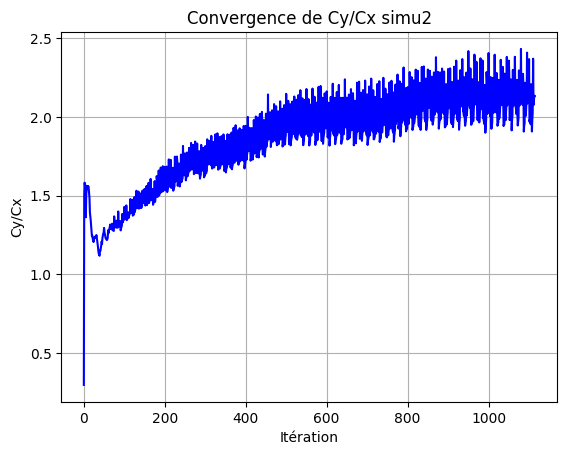

In [64]:
plot_result(file_name='result/simu2/Efforts.txt', numero=2)

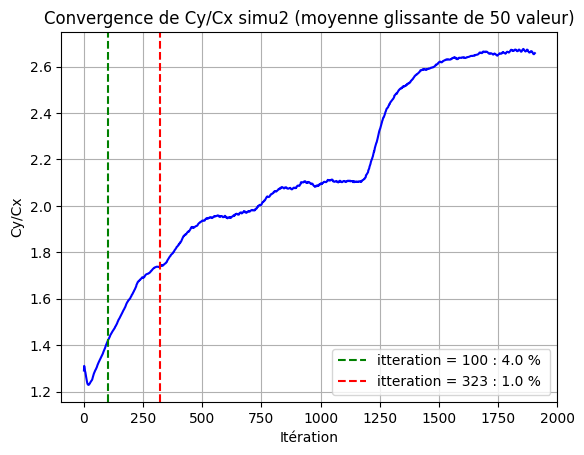

In [65]:
plot_result_filtre(file_name='result/simu2/Efforts.txt', numero=2, nombre_filtre=50)
plot_percetage(file_name='result/simu2/Efforts.txt', nombre_filtre=50, percetage_end=0.04, color= 'green')
plot_percetage(file_name='result/simu2/Efforts.txt', nombre_filtre=50, percetage_end=0.01)

In [66]:
#fin_algo(file_name='Resultats/Efforts.txt', nombre_filtre=50, percetage_end=0.01)

### SImu 3 Re = 10^2

On a 1115 incréments
La moyenne de finesse est de 1.287


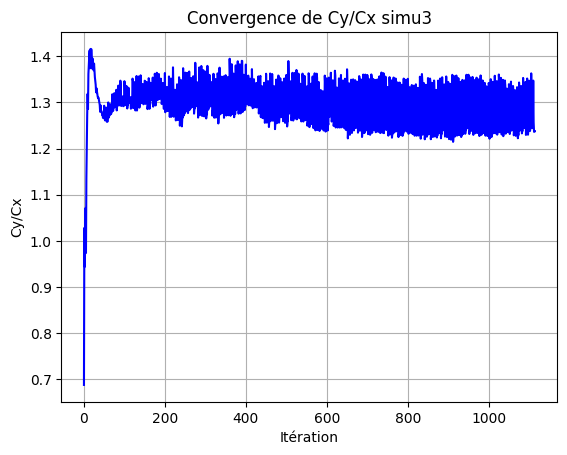

In [67]:
plot_result(file_name='Resultats/Efforts.txt', numero=3)

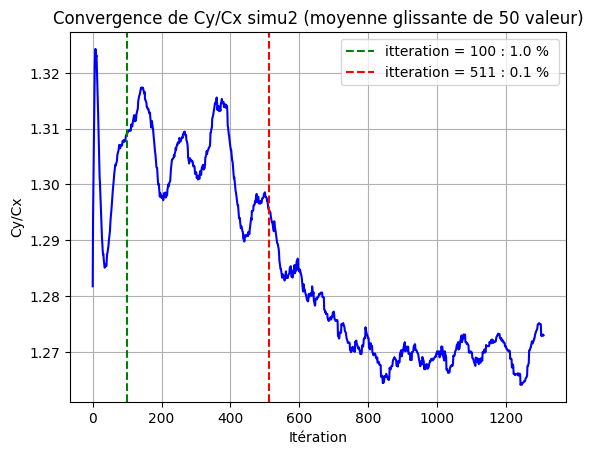

In [68]:
plot_result_filtre(file_name='Resultats/Efforts.txt', numero=2, nombre_filtre=50)
plot_percetage(file_name='Resultats/Efforts.txt', nombre_filtre=50, percetage_end=0.01, color= 'green')
plot_percetage(file_name='Resultats/Efforts.txt', nombre_filtre=50, percetage_end=0.001)

On a 100 incréments
La moyenne de finesse est de 1.1


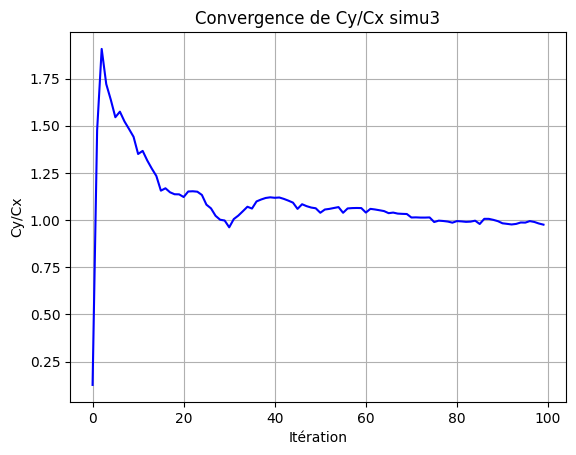

In [77]:
plot_result(file_name='Resultats/Efforts.txt', numero=3)



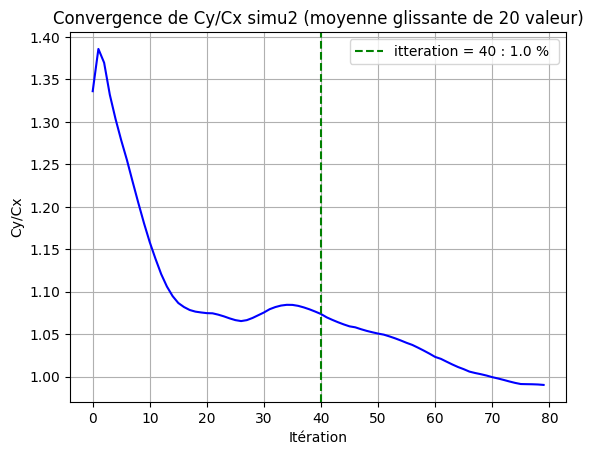

In [79]:
plot_result_filtre(file_name='Resultats/Efforts.txt', numero=2, nombre_filtre=20)
plot_percetage(file_name='Resultats/Efforts.txt', nombre_filtre=20, percetage_end=0.01, color= 'green')
plot_percetage(file_name='Resultats/Efforts.txt', nombre_filtre=20, percetage_end=0.001)